In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

In [112]:


def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_crime_type = None
    encountered_crime_type = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if not encountered_crime_type or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            current_crime_type = cell_a_value
            encountered_crime_type = True  
            continue 
        
        # After a crime type, the next rows are sex  until the next crime type.

        if cell_a_value and encountered_crime_type:
            sex = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                year = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([current_crime_type, sex, year, value])
            continue
        
        # Reset the flag if this row is empty and we're between crime types
        if cell_a_value == None:
            encountered_crime_type = False

    df = pd.DataFrame(data, columns=['Type of Crime', 'sex', 'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\crimesbysex.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df['Type_of_Crime'] = df['Type_of_Crime'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['sex'] = df['sex'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()
df = df[df['sex'] != 'Total']
df = df[df['Type_of_Crime'] != 'Delitos']
df_sex = df


In [113]:
grouped = df_sex.groupby(['Type_of_Crime', 'sex','Year'])['Value'].sum().reset_index(name='total_crimes')
total_crimes_crime= df_sex.groupby(['Type_of_Crime','Year'])['Value'].sum().reset_index(name='crimetype_total')
merged_sex= pd.merge(grouped, total_crimes_crime, on=['Type_of_Crime','Year'])
merged_sex['percentage'] = (merged_sex['total_crimes'] / merged_sex['crimetype_total']) * 100
merged_sex

,Type_of_Crime,sex,Year,total_crimes,crimetype_total,percentage
0,Contra el orden público,Females,2013,1478,12744,11.597615
1,Contra el orden público,Males,2013,11266,12744,88.402385
2,Contra el orden público,Females,2014,1668,13317,12.525344
3,Contra el orden público,Males,2014,11649,13317,87.474656
4,Contra el orden público,Females,2015,1822,13745,13.255729
...,...,...,...,...,...,...
255,Torturas e integridad moral,Males,2020,6676,7078,94.320429
256,Torturas e integridad moral,Females,2021,531,9700,5.474227
257,Torturas e integridad moral,Males,2021,9169,9700,94.525773
258,Torturas e integridad moral,Females,2022,595,9842,6.045519


In [114]:

import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_region_type = None
    encountered_region_type = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if not encountered_region_type or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            current_region_type = cell_a_value
            encountered_region_type = True  
            continue 
        
        # After a crime type, the next rows are sex  until the next crime type.

        if cell_a_value and encountered_region_type:
            sex = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                year = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([current_region_type, sex, year, value])
            continue
        
        # Reset the flag if this row is empty and we're between crime types
        if cell_a_value == None:
            encountered_region_type = False

    df = pd.DataFrame(data, columns=['Region', 'Type_of_Crime', 'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\crimesbyregion.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'National Total']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()
df['Type_of_Crime'] = df['Type_of_Crime'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Type_of_Crime'] = df['Type_of_Crime'].str.strip()

df = df[df['Type_of_Crime'] != 'Total Offenses']

df_region_crime = df


In [115]:

result_sex_df = pd.merge(df_region_crime, merged_sex, on=['Type_of_Crime', 'Year'], how='left')

In [116]:

result_sex_df['final_value'] = ((result_sex_df['Value'] * result_sex_df['percentage'])/100)

In [117]:
file_path = r'C:\Users\mahes\Downloads\age_exp.xlsx'
result_sex_df.to_excel(file_path, index=False, engine='openpyxl')

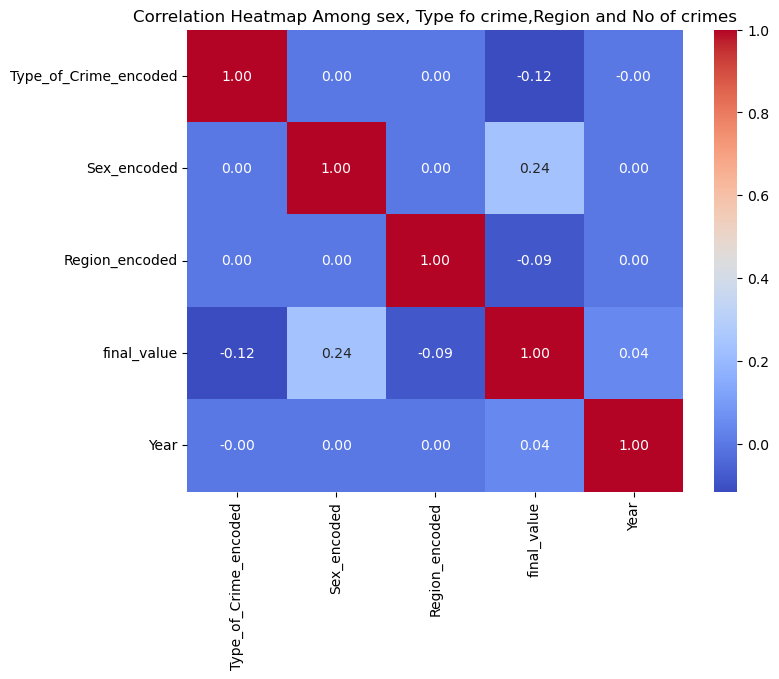

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered_summ = result_sex_df
# Encoding 'Type_of_Crime' and 'Age'
df_filtered_summ['Type_of_Crime_encoded'] = df_filtered_summ['Type_of_Crime'].astype('category').cat.codes
df_filtered_summ['Region_encoded'] = df_filtered_summ['Region'].astype('category').cat.codes
df_filtered_summ['Sex_encoded'] = df_filtered_summ['sex'].astype('category').cat.codes
# Calculate correlations among encoded variables and 'Value'
corr = df_filtered_summ[['Type_of_Crime_encoded', 'Sex_encoded','Region_encoded', 'final_value','Year']].corr()

# Plotting heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Among sex, Type fo crime,Region and No of crimes')
plt.show()

In [119]:
#No of crimes and type of crime commited got a slight negative correlation
#No of crimes and region got a slight negative correlation

In [120]:

df_summary = df_filtered_summ.groupby('Year')['final_value'].sum().reset_index()
df_summary['Year'] = pd.to_datetime(df_summary['Year'].astype(str) + '-12-31')
df_summary.set_index('Year', inplace=True)

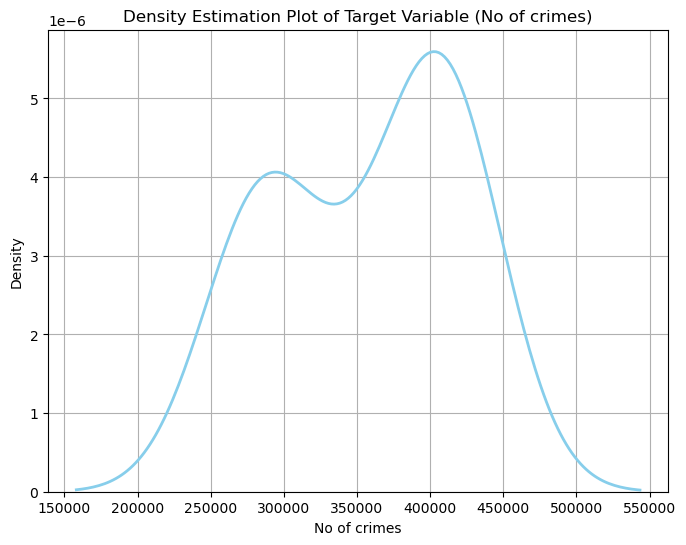

In [121]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df_summary['final_value'], color='skyblue', linewidth=2)
plt.title('Density Estimation Plot of Target Variable (No of crimes)')
plt.xlabel('No of crimes')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [122]:
#analysis is that the no of crimes  is not balanced as there is right skewed

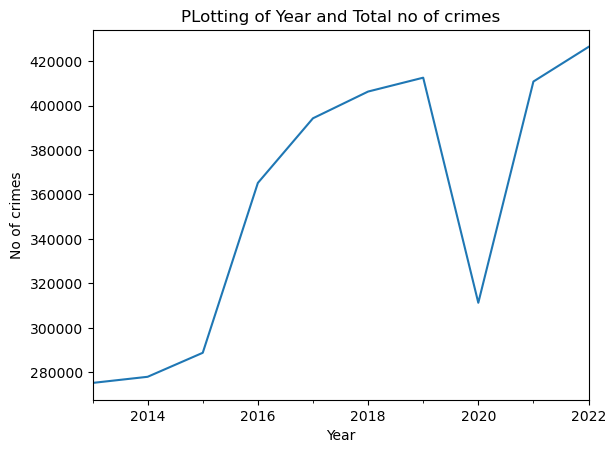

In [123]:
df_summary['final_value'].plot(title='PLotting of Year and Total no of crimes')
plt.ylabel('No of crimes')
plt.show()

In [124]:
#The drop in crimes in 2020 can be due to corona

In [125]:
#Forecast for the total no of crimes

In [126]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

result = adfuller(df_summary['final_value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret the p-value
if result[1] > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

ADF Statistic: -1.531571
p-value: 0.517840
Series is not stationary


In [127]:
from pmdarima.arima import auto_arima

model = auto_arima(df_summary['final_value'], start_p=0, start_q=0,
                   test='adf',       
                   max_p=3, max_q=3,
                   m=1,           
                   d=None,          
                   seasonal=False,  
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=209.358, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=210.032, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=208.400, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=207.575, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=209.359, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.153 seconds


In [128]:
#Considering order of 0 ,2, 0 for order 

model = ARIMA(df_summary['final_value'], order=(0,2,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            final_value   No. Observations:                   10
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -102.787
Date:                Sun, 17 Mar 2024   AIC                            207.575
Time:                        17:59:01   BIC                            207.654
Sample:                    12-31-2013   HQIC                           207.039
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.591e+09    2.4e+09      2.750      0.006    1.89e+09    1.13e+10
Ljung-Box (L1) (Q):                   4.14   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.04   Pr

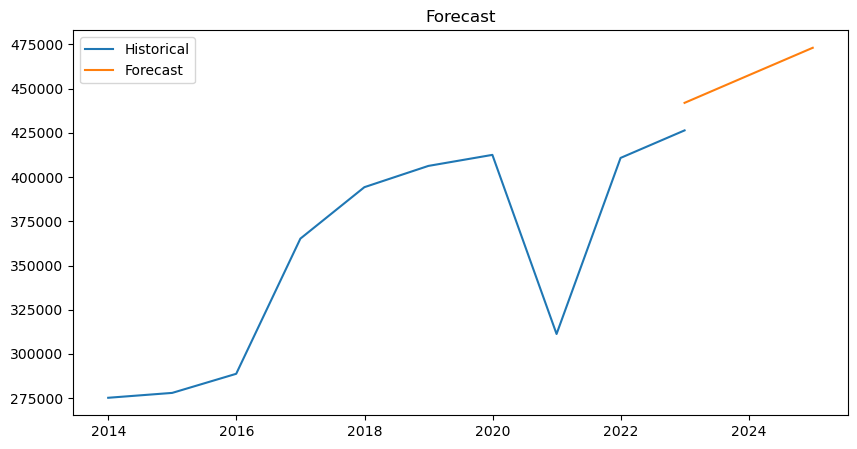

                 Date  Forecast
2023-12-31 2022-12-31  441990.0
2024-12-31 2023-12-31  457564.0
2025-12-31 2024-12-31  473138.0


In [129]:
# Forecast the next 2 years
forecast_dates = pd.date_range(df_summary.index[-1], periods=3, freq='A')
forecast = model_fit.forecast(steps=len(forecast_dates))

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_summary.index, df_summary['final_value'], label='Historical')
plt.plot(forecast_dates, forecast, label='Forecast')  
plt.title('Forecast')
plt.legend()
plt.show()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast
})

print(forecast_df)

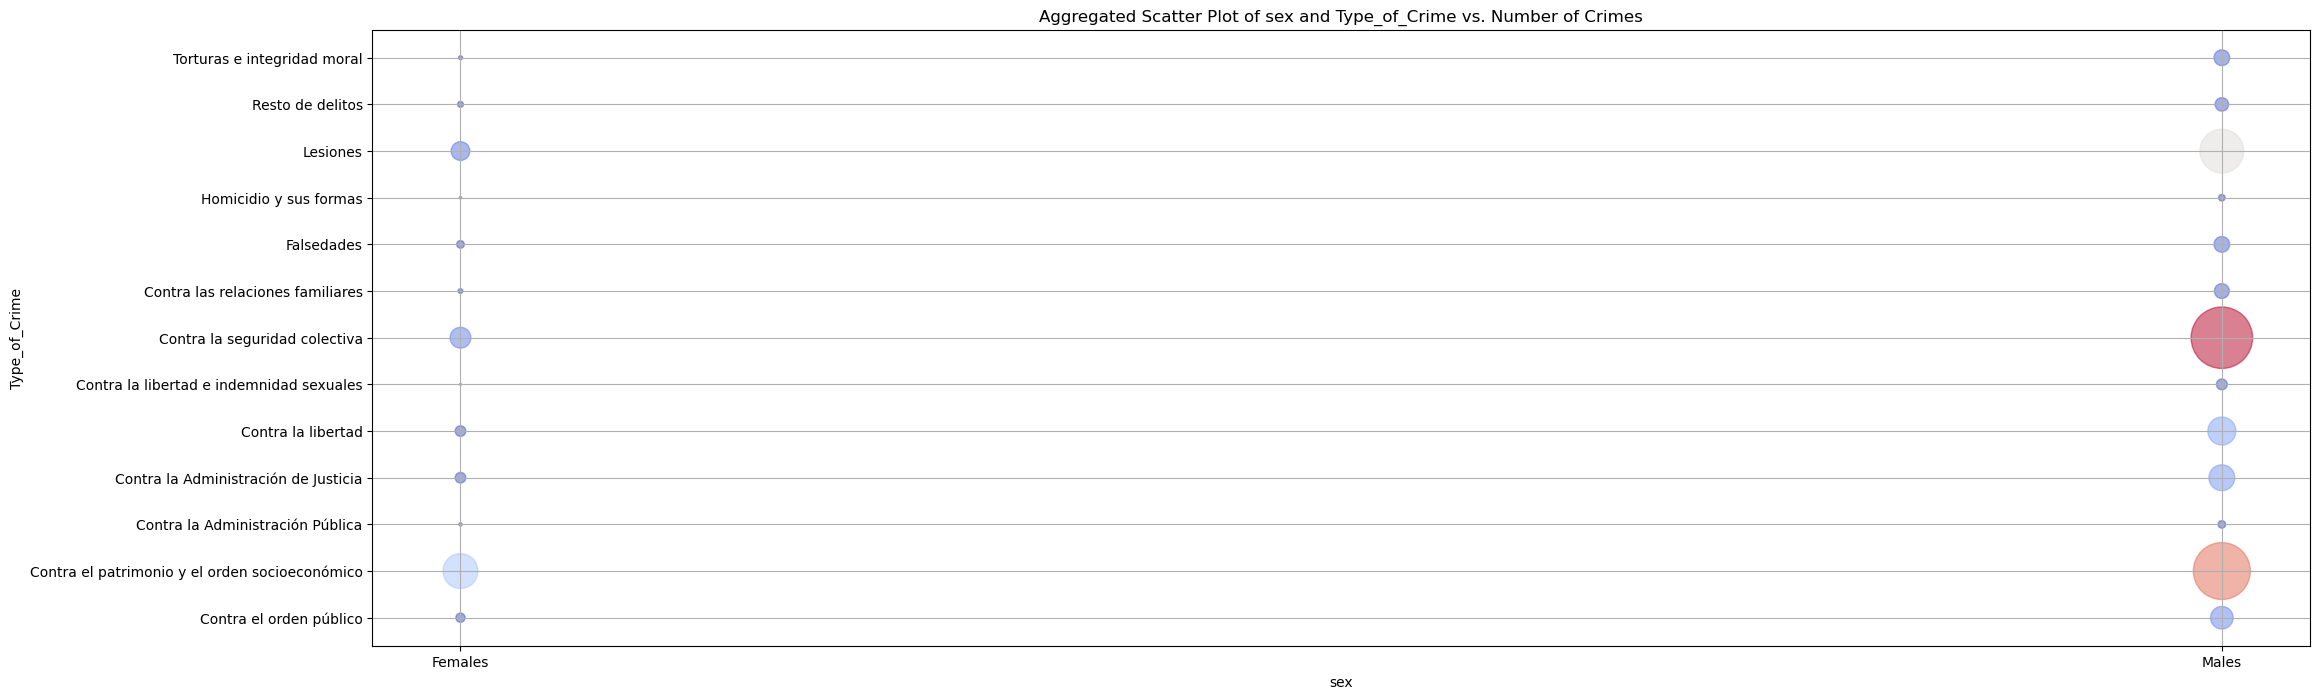

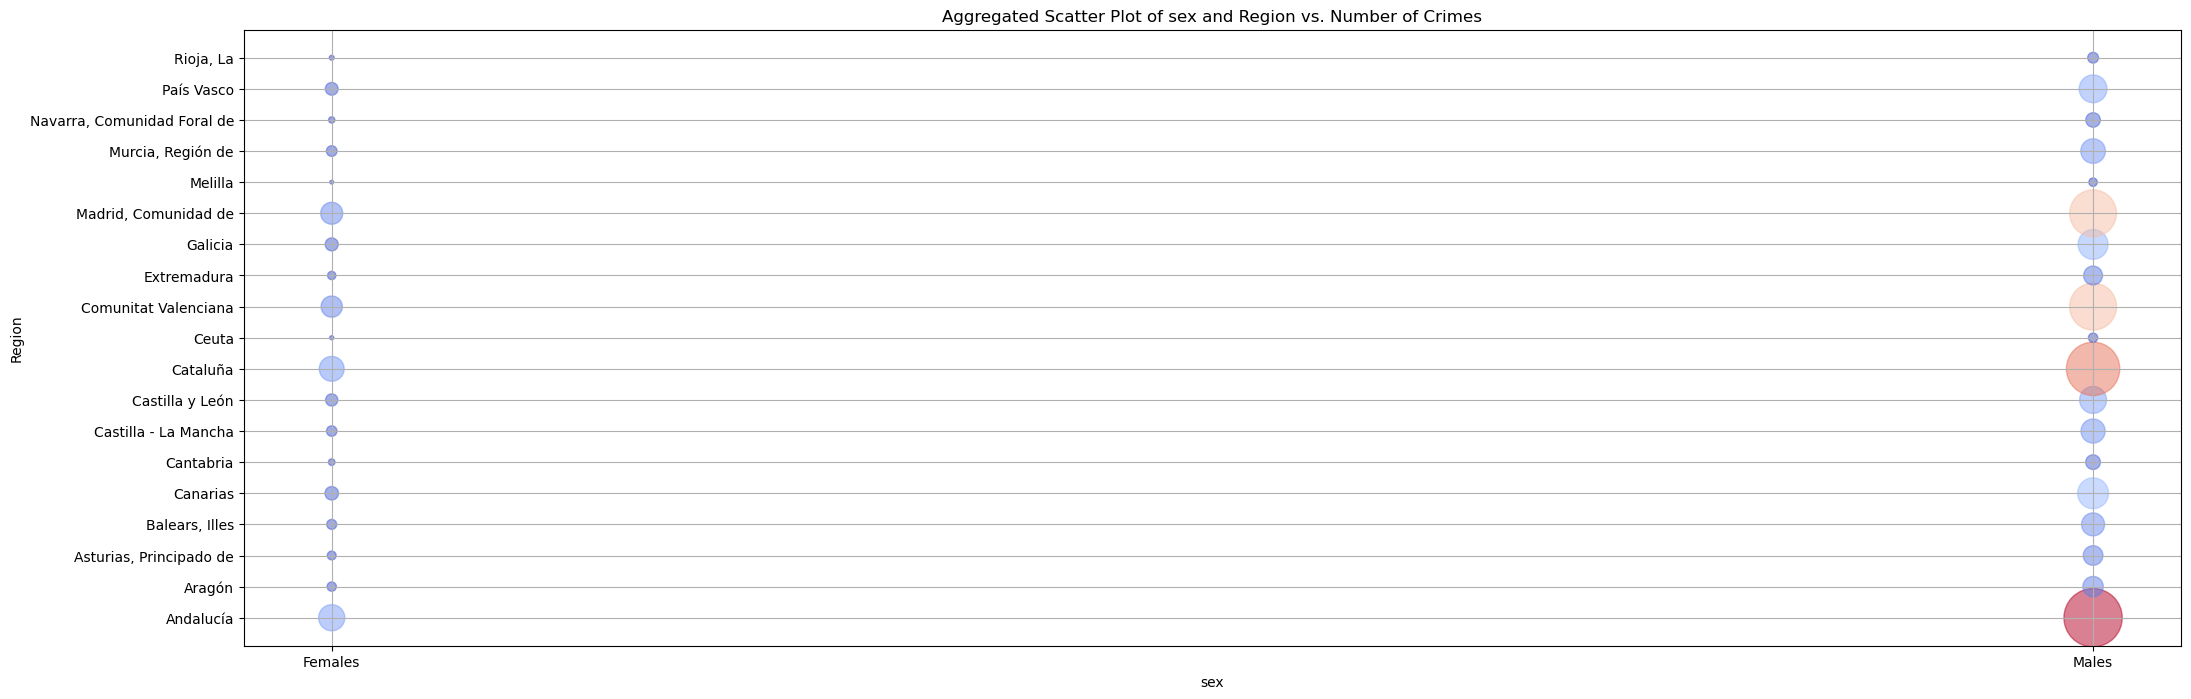

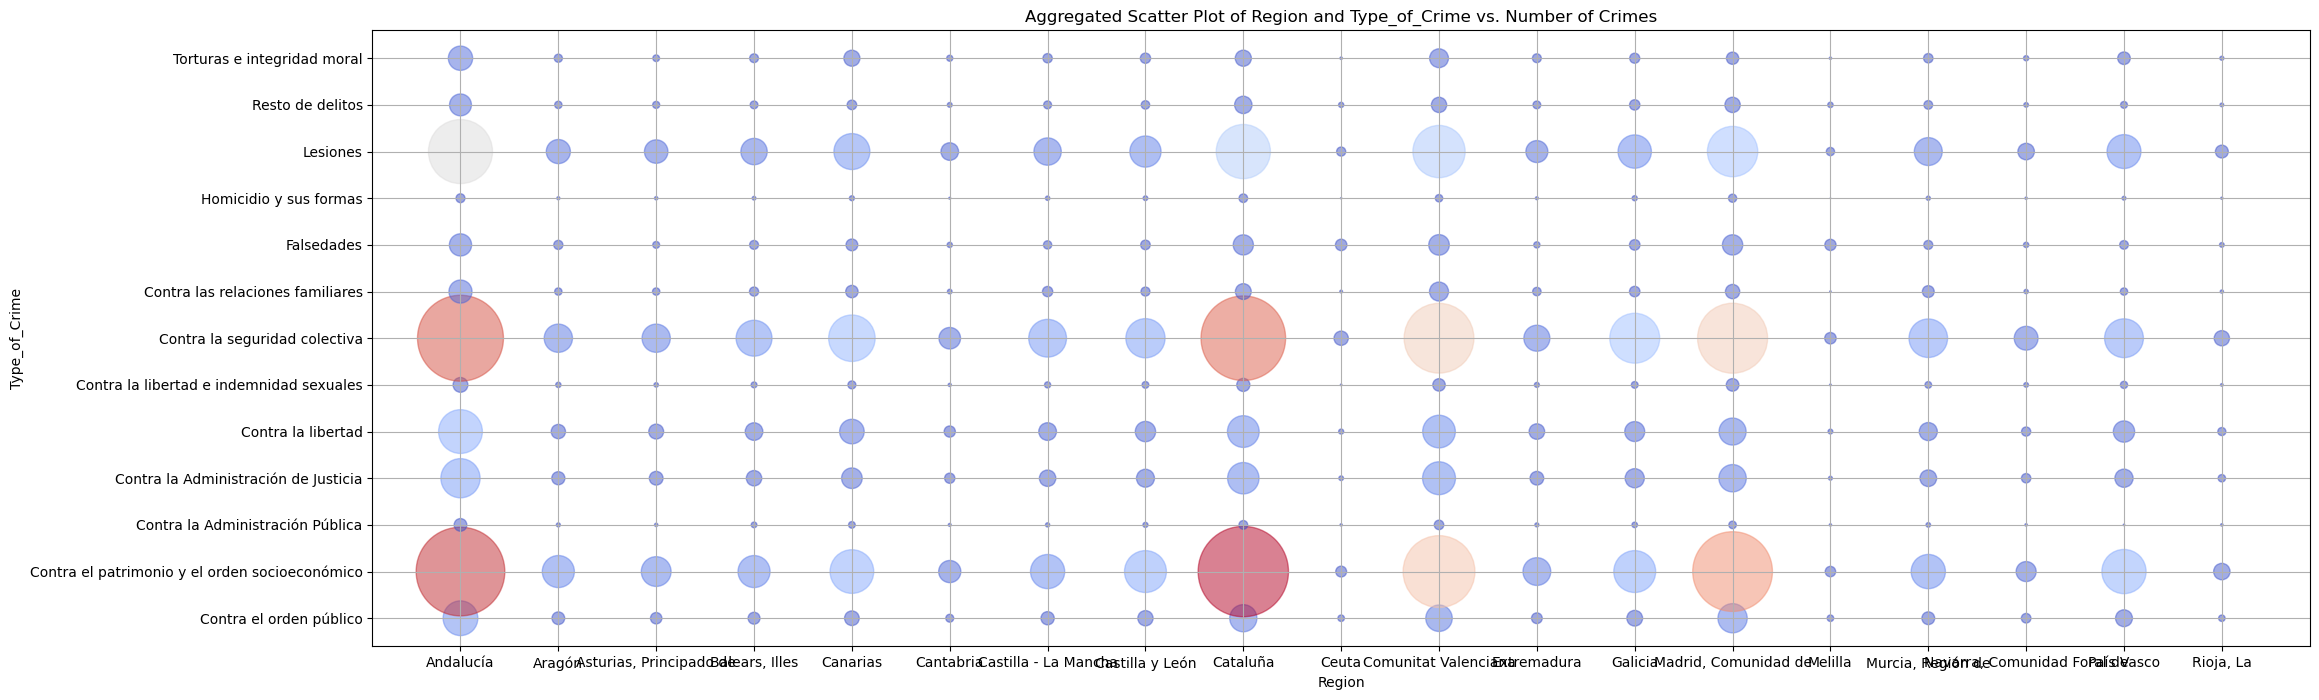

In [130]:
# Aggregate data


agg_df_crimetype = df_filtered_summ.groupby(['sex', 'Type_of_Crime']).agg({'final_value': 'mean'}).reset_index()
agg_df_region = df_filtered_summ.groupby(['sex', 'Region']).agg({'final_value': 'mean'}).reset_index()
agg_df_cross = df_filtered_summ.groupby(['Type_of_Crime', 'Region']).agg({'final_value': 'mean'}).reset_index()
def plot_crime_data(df, group_by,dime):

    # Aggregate data
    agg_df = df.groupby([dime, group_by]).agg({'final_value': 'mean'}).reset_index()
    
    # Plot
    plt.figure(figsize=(25, 8))
    plt.scatter(agg_df[dime], agg_df[group_by], s=agg_df['final_value'] * 0.4, alpha=0.5, c=agg_df['final_value'], cmap='coolwarm')
    plt.title(f'Aggregated Scatter Plot of {dime} and {group_by} vs. Number of Crimes')
    plt.xlabel(f'{dime}')
    plt.ylabel(group_by)
    plt.grid(True)
    plt.show()


plot_crime_data(agg_df_crimetype, 'Type_of_Crime','sex')
plot_crime_data(agg_df_region, 'Region','sex')
plot_crime_data(agg_df_cross, 'Type_of_Crime','Region')


In [131]:
#Prediction of no of crimes considering sex and type of crime as regressor

In [132]:
#First using Prophet

In [133]:
#!pip install prophet

In [134]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # for saving the encoder model

# Initialize the encoders
type_of_crime_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['Type_of_Crime_encoded'],axis = 1, errors='ignore')
df_filtered_summ = df_filtered_summ.drop(['Region_encoded'] ,axis = 1,errors='ignore')
df_filtered_summ = df_filtered_summ.drop(['Sex_encoded'] ,axis = 1,errors='ignore')

# Assuming your DataFrame 'df' has 'type_of_crime' and 'sex' columns
df_filtered_summ['type_of_crime_encoded'] = type_of_crime_encoder.fit_transform(df_filtered_summ['Type_of_Crime'])
df_filtered_summ['sex_encoded'] = sex_encoder.fit_transform(df_filtered_summ['sex'])
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])

In [135]:
df_filtered_summ

,Region,Type_of_Crime,Year,Value,sex,total_crimes,crimetype_total,percentage,final_value,type_of_crime_encoded,sex_encoded,region_encoded
0,Andalucía,Homicidio y sus formas,2022,172,Females,123,1088,11.305147,19.444853,9,0,0
1,Andalucía,Homicidio y sus formas,2022,172,Males,965,1088,88.694853,152.555147,9,1,0
2,Andalucía,Homicidio y sus formas,2021,176,Females,148,1145,12.925764,22.749345,9,0,0
3,Andalucía,Homicidio y sus formas,2021,176,Males,997,1145,87.074236,153.250655,9,1,0
4,Andalucía,Homicidio y sus formas,2020,174,Females,129,1036,12.451737,21.666023,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4935,Melilla,Resto de delitos,2015,89,Males,4360,5016,86.921850,77.360447,11,1,14
4936,Melilla,Resto de delitos,2014,55,Females,513,4155,12.346570,6.790614,11,0,14
4937,Melilla,Resto de delitos,2014,55,Males,3642,4155,87.653430,48.209386,11,1,14
4938,Melilla,Resto de delitos,2013,48,Females,480,3721,12.899758,6.191884,11,0,14


In [136]:
# Save the encoders for future use
joblib.dump(type_of_crime_encoder, 'type_of_crime_encoder.joblib')
joblib.dump(sex_encoder, 'sex_encoder.joblib')
joblib.dump(region_encoder, 'region_encoder.joblib')

['region_encoder.joblib']

In [137]:
from prophet  import Prophet
import pandas as pd

# Prepare your DataFrame for Prophet
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['Year'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['final_value']


In [138]:
    # Initialize and fit the Prophet model with additional regressors
model = Prophet(yearly_seasonality=False,changepoint_prior_scale=0.10)
model.add_regressor('sex_encoded',  prior_scale=100)
model.add_regressor('type_of_crime_encoded', prior_scale=100)
model.add_regressor('region_encoded', prior_scale=100)
model.fit(df_filtered_summ[['ds','region_encoded','type_of_crime_encoded','sex_encoded','y']], algorithm='LBFGS', iter=20000)

17:59:04 - cmdstanpy - INFO - Chain [1] start processing
17:59:05 - cmdstanpy - INFO - Chain [1] done processing


In [139]:
#prediction paarmeters input
sex_category = "Males"
type_of_crime = "Homicidio y sus formas"
region_input = "Canarias"
prediction_year = 2025

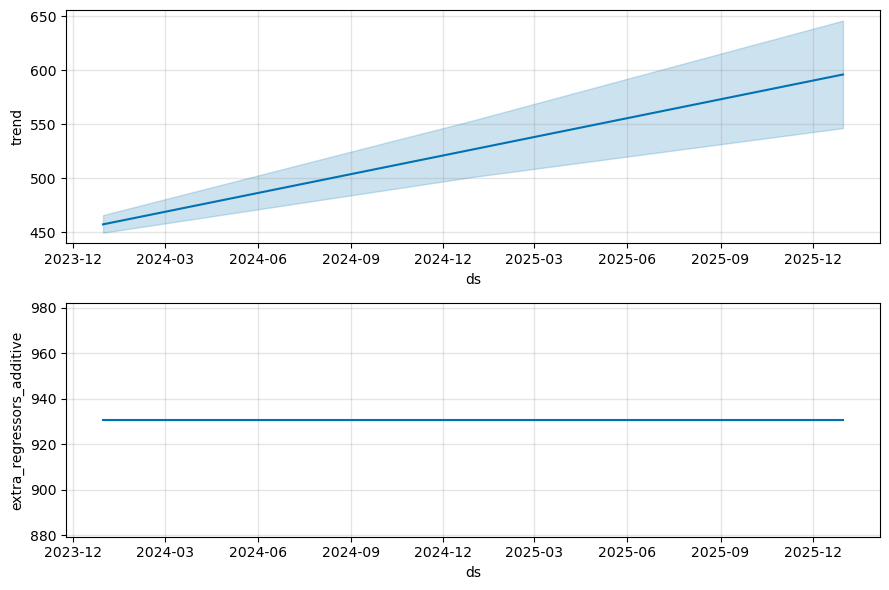

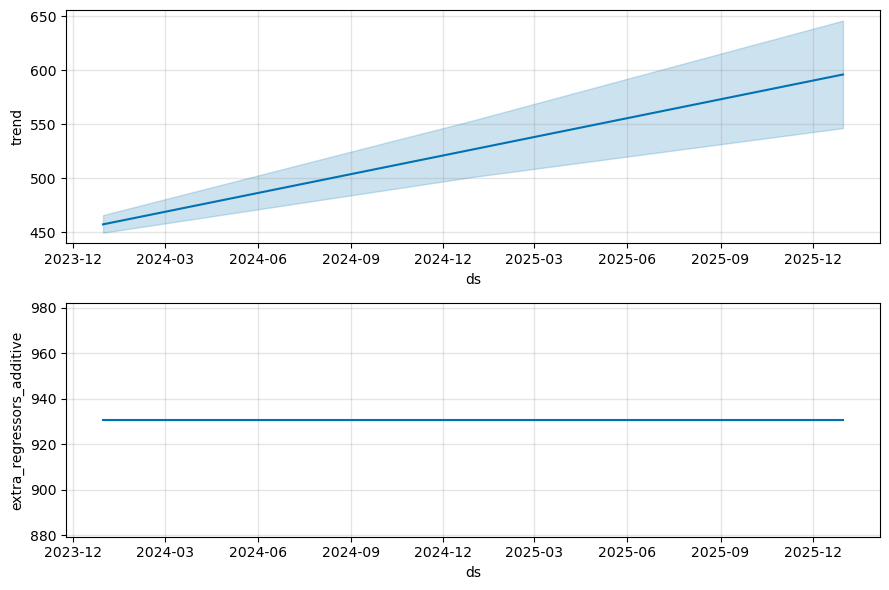

In [140]:
import matplotlib.pyplot as plt

# Load encoders
loaded_type_of_crime_encoder = joblib.load('type_of_crime_encoder.joblib')
loaded_sex_encoder = joblib.load('sex_encoder.joblib')
loaded_region_encoder = joblib.load('region_encoder.joblib')
# Encode input parameters
input_sex_encoded = loaded_sex_encoder.transform([sex_category])[0]
input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Prepare future DataFrame for Prophet
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, prediction_year + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])
future_df = pd.DataFrame({'ds': future_dates})

future_df['region_encoded'] = input_region_encoded
future_df['type_of_crime_encoded'] = input_type_of_crime_encoded
future_df['sex_encoded'] = input_sex_encoded



forecast = model.predict(future_df[['ds','region_encoded','type_of_crime_encoded','sex_encoded']])
model.plot_components(forecast)


In [141]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-12-31', '2021-12-31'])
df_cv = cross_validation(model,horizon = '365 days',initial = '2920 days', period = '365 days')
df_cv.head() 

  0%|          | 0/1 [00:00<?, ?it/s]

17:59:07 - cmdstanpy - INFO - Chain [1] start processing
17:59:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-12-31,134.399908,-2289.532432,2402.155470,1528.141068,2021-12-31
1,2022-12-31,604.092570,-1811.487595,3135.101782,409.165572,2021-12-31
2,2022-12-31,1539.141378,-930.990579,3938.453975,2611.703749,2021-12-31
3,2022-12-31,1417.644580,-1012.650190,3974.473103,4.420575,2021-12-31
4,2022-12-31,1528.414011,-920.623172,3912.668608,7781.858932,2021-12-31


In [142]:
#METRICS ACCORDING TO THE HORIZON
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.390257e+06,2321.692596,1163.888944,83.826597,4.325453,1.366128,0.939271


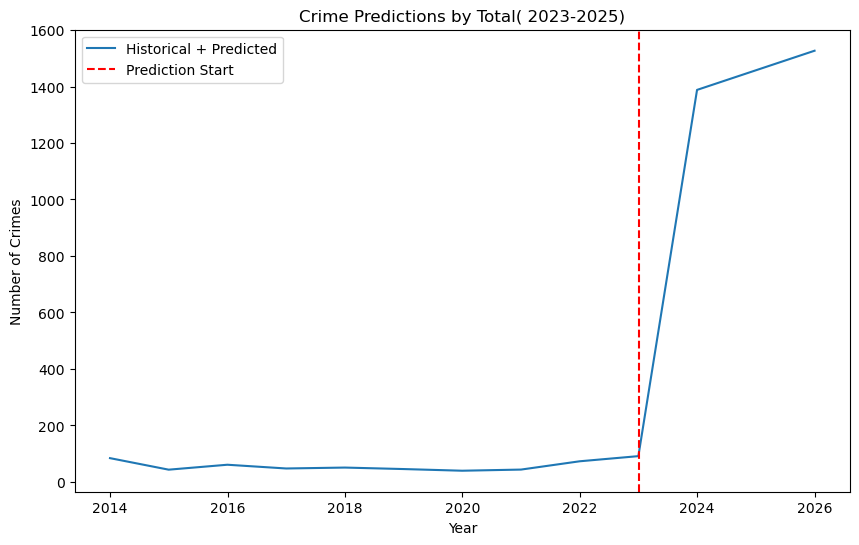

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Combine historical and forecast data for plotting
historical_data =  df_filtered_summ[(df_filtered_summ['sex_encoded'] == input_sex_encoded) & (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & (df_filtered_summ['region_encoded'] == input_region_encoded)]
forecast_data = forecast[['ds', 'yhat']].rename(columns={'yhat': 'y'})
combined_data = pd.concat([historical_data, forecast_data])
combined_data = combined_data.sort_values(by='ds')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_data['ds'], combined_data['y'], label='Historical + Predicted')
plt.axvline(x=pd.to_datetime('2023'), color='r', linestyle='--', label='Prediction Start')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Predictions by Total( 2023-2025)')
plt.legend()
plt.show()

In [144]:
#Model is not ideal for varibales with additional regressor 



In [145]:
#!pip install lightgbm

In [146]:
df_filtered_summ = df_filtered_summ.sort_values(by=['sex_encoded', 'region_encoded','type_of_crime_encoded', 'ds'])
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['sex_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(1)
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['sex_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(2)
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['sex_encoded', 'region_encoded','type_of_crime_encoded'])['y'].shift(3)
# Fill missing values in lagged columns with the first available 'y' value in each group
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby(['sex_encoded','region_encoded', 'type_of_crime_encoded'])['y_lag1'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby(['sex_encoded','region_encoded', 'type_of_crime_encoded'])['y_lag2'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby(['sex_encoded', 'region_encoded','type_of_crime_encoded'])['y_lag3'].transform(lambda x: x.fillna(method='bfill'))

df_filtered_summ['y'] = df_filtered_summ['y'].astype(float)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

cutoff_date = df_filtered_summ['ds'].max() - pd.DateOffset(years=2)

# Split your dataset based on the cutoff date
train_df = df_filtered_summ[df_filtered_summ['ds'] <= cutoff_date][['sex_encoded', 'region_encoded','type_of_crime_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
test_df = df_filtered_summ[df_filtered_summ['ds'] > cutoff_date][['sex_encoded', 'region_encoded','type_of_crime_encoded', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
# Split the data into training and testing sets
X_train = train_df.drop(['ds', 'y'], axis=1)
y_train = train_df['y']
X_test = test_df.drop(['ds', 'y'], axis=1)
y_test = test_df['y']

In [148]:
# Initialize and train the LightGBM model
model = LGBMRegressor(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 3952, number of used features: 6
[LightGBM] [Info] Start training from score 691.189273


LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [149]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')


Test RMSE: 648.4105117303192


In [150]:

#prediction paarmeters input
age_category = "Males"
type_of_crime = "Homicidio y sus formas"
region_input = "Canarias"
prediction_year = 2025

In [151]:
# Encode input parameters
input_age_encoded = loaded_sex_encoder.transform([age_category])[0]
input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Filter df_filtered for the specific 'Age' and 'Type_of_Crime' to get the most recent 'y'
specific_filter = (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & (df_filtered_summ['sex_encoded'] == input_sex_encoded) &  (df_filtered_summ['region_encoded'] == input_region_encoded)
filtered_for_specific = df_filtered_summ[specific_filter ]

if filtered_for_specific.empty:
    print(f"No historical data found for Sex: {age_category} and Type of Crime: {type_of_crime}.")
else:
    last_date = filtered_for_specific['ds'].max()
    last_year = last_date.year



In [152]:
filtered_for_specific = filtered_for_specific.sort_values('ds')
for year in range(last_year + 1, prediction_year ):
    # Check if there are at least three records to retrieve the second and third last 'y' values
    if len(filtered_for_specific) >= 3:
        most_recent_y = filtered_for_specific.iloc[-1]['y'] 
        most_recent_y1 = filtered_for_specific.iloc[-2]['y'] 
        most_recent_y2 = filtered_for_specific.iloc[-3]['y']  
    elif len(filtered_for_specific) == 2:
        most_recent_y = filtered_for_specific.iloc[-1]['y']
        most_recent_y1 = filtered_for_specific.iloc[-2]['y']
        most_recent_y2 = most_recent_y1  
    else:  
        most_recent_y = filtered_for_specific.iloc[-1]['y'] if len(filtered_for_specific) >= 1 else 0
        most_recent_y1 = most_recent_y
        most_recent_y2 = most_recent_y

    # Prepare DataFrame for prediction
    predict_df = pd.DataFrame({
        'sex_encoded': [input_sex_encoded],
        'region_encoded':[input_region_encoded],
        'type_of_crime_encoded': [input_type_of_crime_encoded],
        'y_lag1': [most_recent_y],
        'y_lag2': [most_recent_y1],
        'y_lag3': [most_recent_y2]
    })

    # Make the prediction
    predicted_y = model.predict(predict_df)[0]

    # Create a new entry for the prediction
    new_date = pd.Timestamp(year, 12, 31) 
    new_entry = {
        'y_lag1': most_recent_y,
        'y_lag2': most_recent_y1,
        'y_lag3': most_recent_y2,
        'ds': new_date,
        'y': predicted_y,
        'sex_encoded': input_sex_encoded,
        'region_encoded':input_region_encoded,
        'type_of_crime_encoded': input_type_of_crime_encoded
    }

    # Append the new entry to specific_data and df_filtered
    new_entry_df = pd.DataFrame([new_entry])
    filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)

    # Update last_date for the next iteration
    last_date = new_date

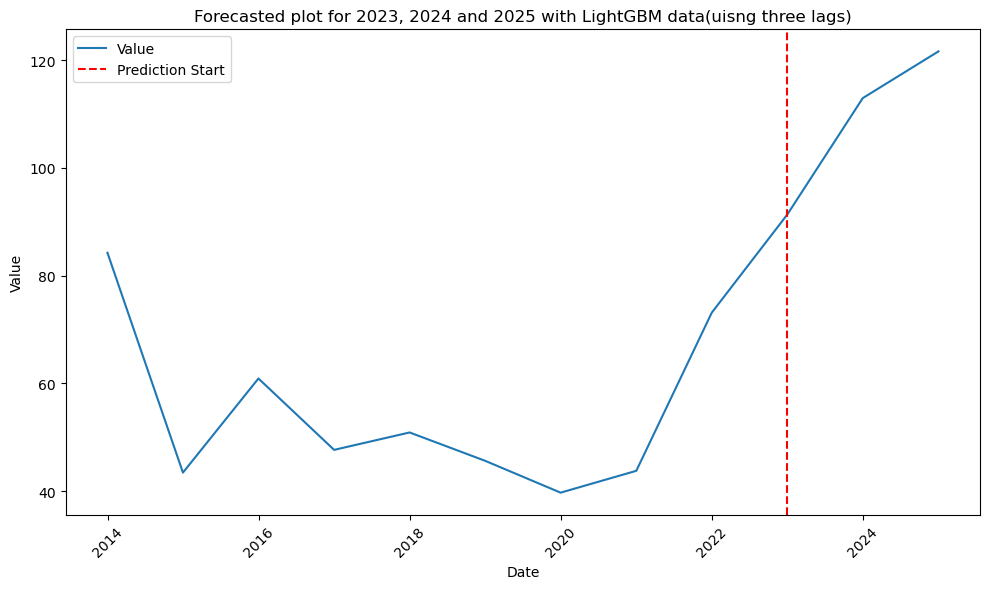

In [153]:
# Plotting
plt.figure(figsize=(10, 6)) 
plt.plot(filtered_for_specific['ds'], filtered_for_specific['y'], label='Value')  
plt.title('Forecasted plot for 2023, 2024 and 2025 with LightGBM data(uisng three lags)')  
plt.xlabel('Date') 
plt.axvline(x=pd.to_datetime('2023'), color='r', linestyle='--', label='Prediction Start')
plt.ylabel('Value') 
plt.xticks(rotation=45)  
plt.legend()  
plt.tight_layout() 
plt.show()

In [154]:
#Preidction using linear regerssion model considering three lags

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Linear Regression Root Mean Squared Error:", rmse_linear)

Linear Regression Root Mean Squared Error: 748.7450160490312


In [156]:
# Encode input parameters
input_age_encoded = loaded_sex_encoder.transform([age_category])[0]
input_type_of_crime_encoded = loaded_type_of_crime_encoder.transform([type_of_crime])[0]
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Filter df_filtered for the specific 'Age' and 'Type_of_Crime'
specific_filter = (df_filtered_summ['type_of_crime_encoded'] == input_type_of_crime_encoded) & (df_filtered_summ['sex_encoded'] == input_sex_encoded) &  (df_filtered_summ['region_encoded'] == input_region_encoded)
filtered_for_specific = df_filtered_summ[specific_filter]

if filtered_for_specific.empty:
    print(f"No historical data found for Sex: {age_category} and Type of Crime: {type_of_crime}.")
else:
    last_date = filtered_for_specific['ds'].max()
    last_year = last_date.year

In [157]:
filtered_for_specific = filtered_for_specific.sort_values('ds')
for year in range(last_year + 1, prediction_year ):
    # Check if there are at least three records to retrieve the second and third last 'y' values
    if len(filtered_for_specific) >= 3:
        most_recent_y = filtered_for_specific.iloc[-1]['y'] 
        most_recent_y1 = filtered_for_specific.iloc[-2]['y'] 
        most_recent_y2 = filtered_for_specific.iloc[-3]['y']  
    elif len(filtered_for_specific) == 2:
        most_recent_y = filtered_for_specific.iloc[-1]['y']
        most_recent_y1 = filtered_for_specific.iloc[-2]['y']
        most_recent_y2 = most_recent_y1  
    else:  
        most_recent_y = filtered_for_specific.iloc[-1]['y'] if len(filtered_for_specific) >= 1 else 0
        most_recent_y1 = most_recent_y
        most_recent_y2 = most_recent_y

    # Prepare DataFrame for prediction
    predict_df = pd.DataFrame({
        'sex_encoded': [input_sex_encoded],
        'region_encoded':[input_region_encoded],
        'type_of_crime_encoded': [input_type_of_crime_encoded],
        'y_lag1': [most_recent_y],
        'y_lag2': [most_recent_y1],
        'y_lag3': [most_recent_y2]
    })

    # Make the prediction
    predicted_y = linear_model.predict(predict_df)[0]

    # Create a new entry for the prediction
    new_date = pd.Timestamp(year, 12, 31) 
    new_entry = {
        'y_lag1': most_recent_y,
        'y_lag2': most_recent_y1,
        'y_lag3': most_recent_y2,
        'ds': new_date,
        'y': predicted_y,
        'sex_encoded': input_sex_encoded,
        'region_encoded':input_region_encoded,
        'type_of_crime_encoded': input_type_of_crime_encoded
    }

    # Append the new entry to specific_data and df_filtered
    new_entry_df = pd.DataFrame([new_entry])
    filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)

    # Update last_date for the next iteration
    last_date = new_date

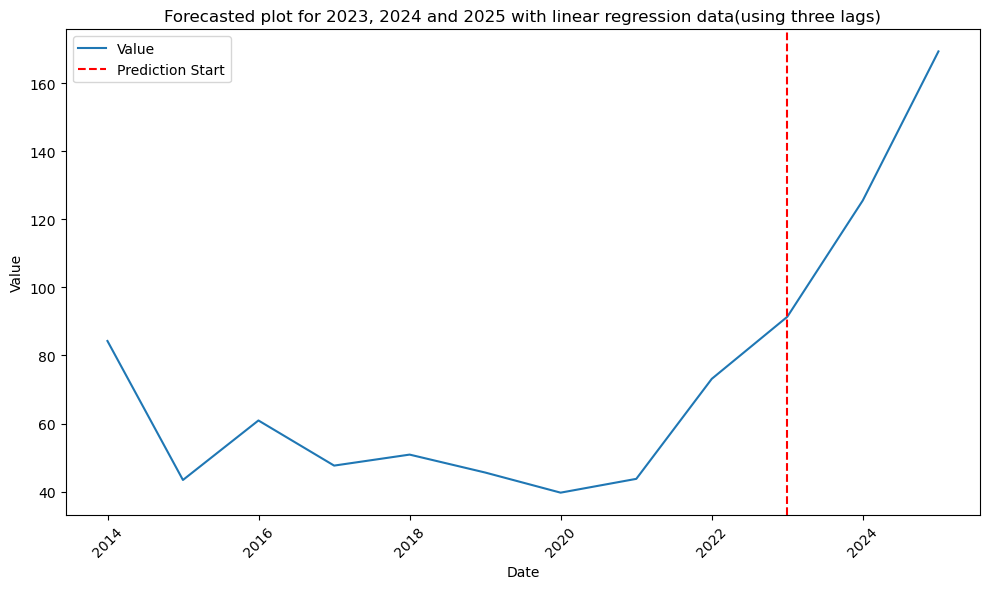

In [158]:
# Plotting
plt.figure(figsize=(10, 6))  
plt.plot(filtered_for_specific['ds'], filtered_for_specific['y'], label='Value')  # Plot 'y' against 'ds'
plt.title('Forecasted plot for 2023, 2024 and 2025 with linear regression data(using three lags)')  
plt.xlabel('Date')  
plt.axvline(x=pd.to_datetime('2023'), color='r', linestyle='--', label='Prediction Start')
plt.ylabel('Value')  
plt.xticks(rotation=45)  
plt.legend() 
plt.tight_layout()  
plt.show()

In [159]:
#Now lets see Sepearate ARIMA model for each region, crime type and age category

In [160]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df_seperate_arima = df_filtered_summ[df_filtered_summ['region_encoded'] == input_region_encoded]

# Preparing the data structure to hold models
models = {}


for crime_type in df_seperate_arima['type_of_crime_encoded'].unique():
    models[crime_type] = {}
    for sex_group in df_seperate_arima['sex_encoded'].unique():
        models[crime_type][sex_group] = {}
        for region in df_seperate_arima['region_encoded'].unique():
            # Filter the dataset for each combination of 'Type of Crime', 'Age', and 'Region'
            df_filt = df_seperate_arima[(df_seperate_arima['type_of_crime_encoded'] == crime_type) & 
                                        (df_seperate_arima['sex_encoded'] == sex_group) & 
                                        (df_seperate_arima['region_encoded'] == region)]
            
            # Check if there's enough data
            if len(df_filt) > 3: 
                df_filt.index = df_filt['ds']
                df_filt.index.freq = 'Y'
                ts = df_filt['y']
                
                # Try fitting the ARIMA model
                try:
                    model = ARIMA(ts, order=(1, 1, 1))  
                    fitted_model = model.fit()
                    
                    # Store the fitted model
                    models[crime_type][sex_group][region] = fitted_model
                except Exception as e:
                    print(f"Model fitting failed for Type of Crime: {crime_type}, Sex: {sex_group}, Region: {region} with error: {e}")
            else:
                print(f"Not enough data for Type of Crime: {crime_type}, Sex: {sex_group}, Region: {region}")


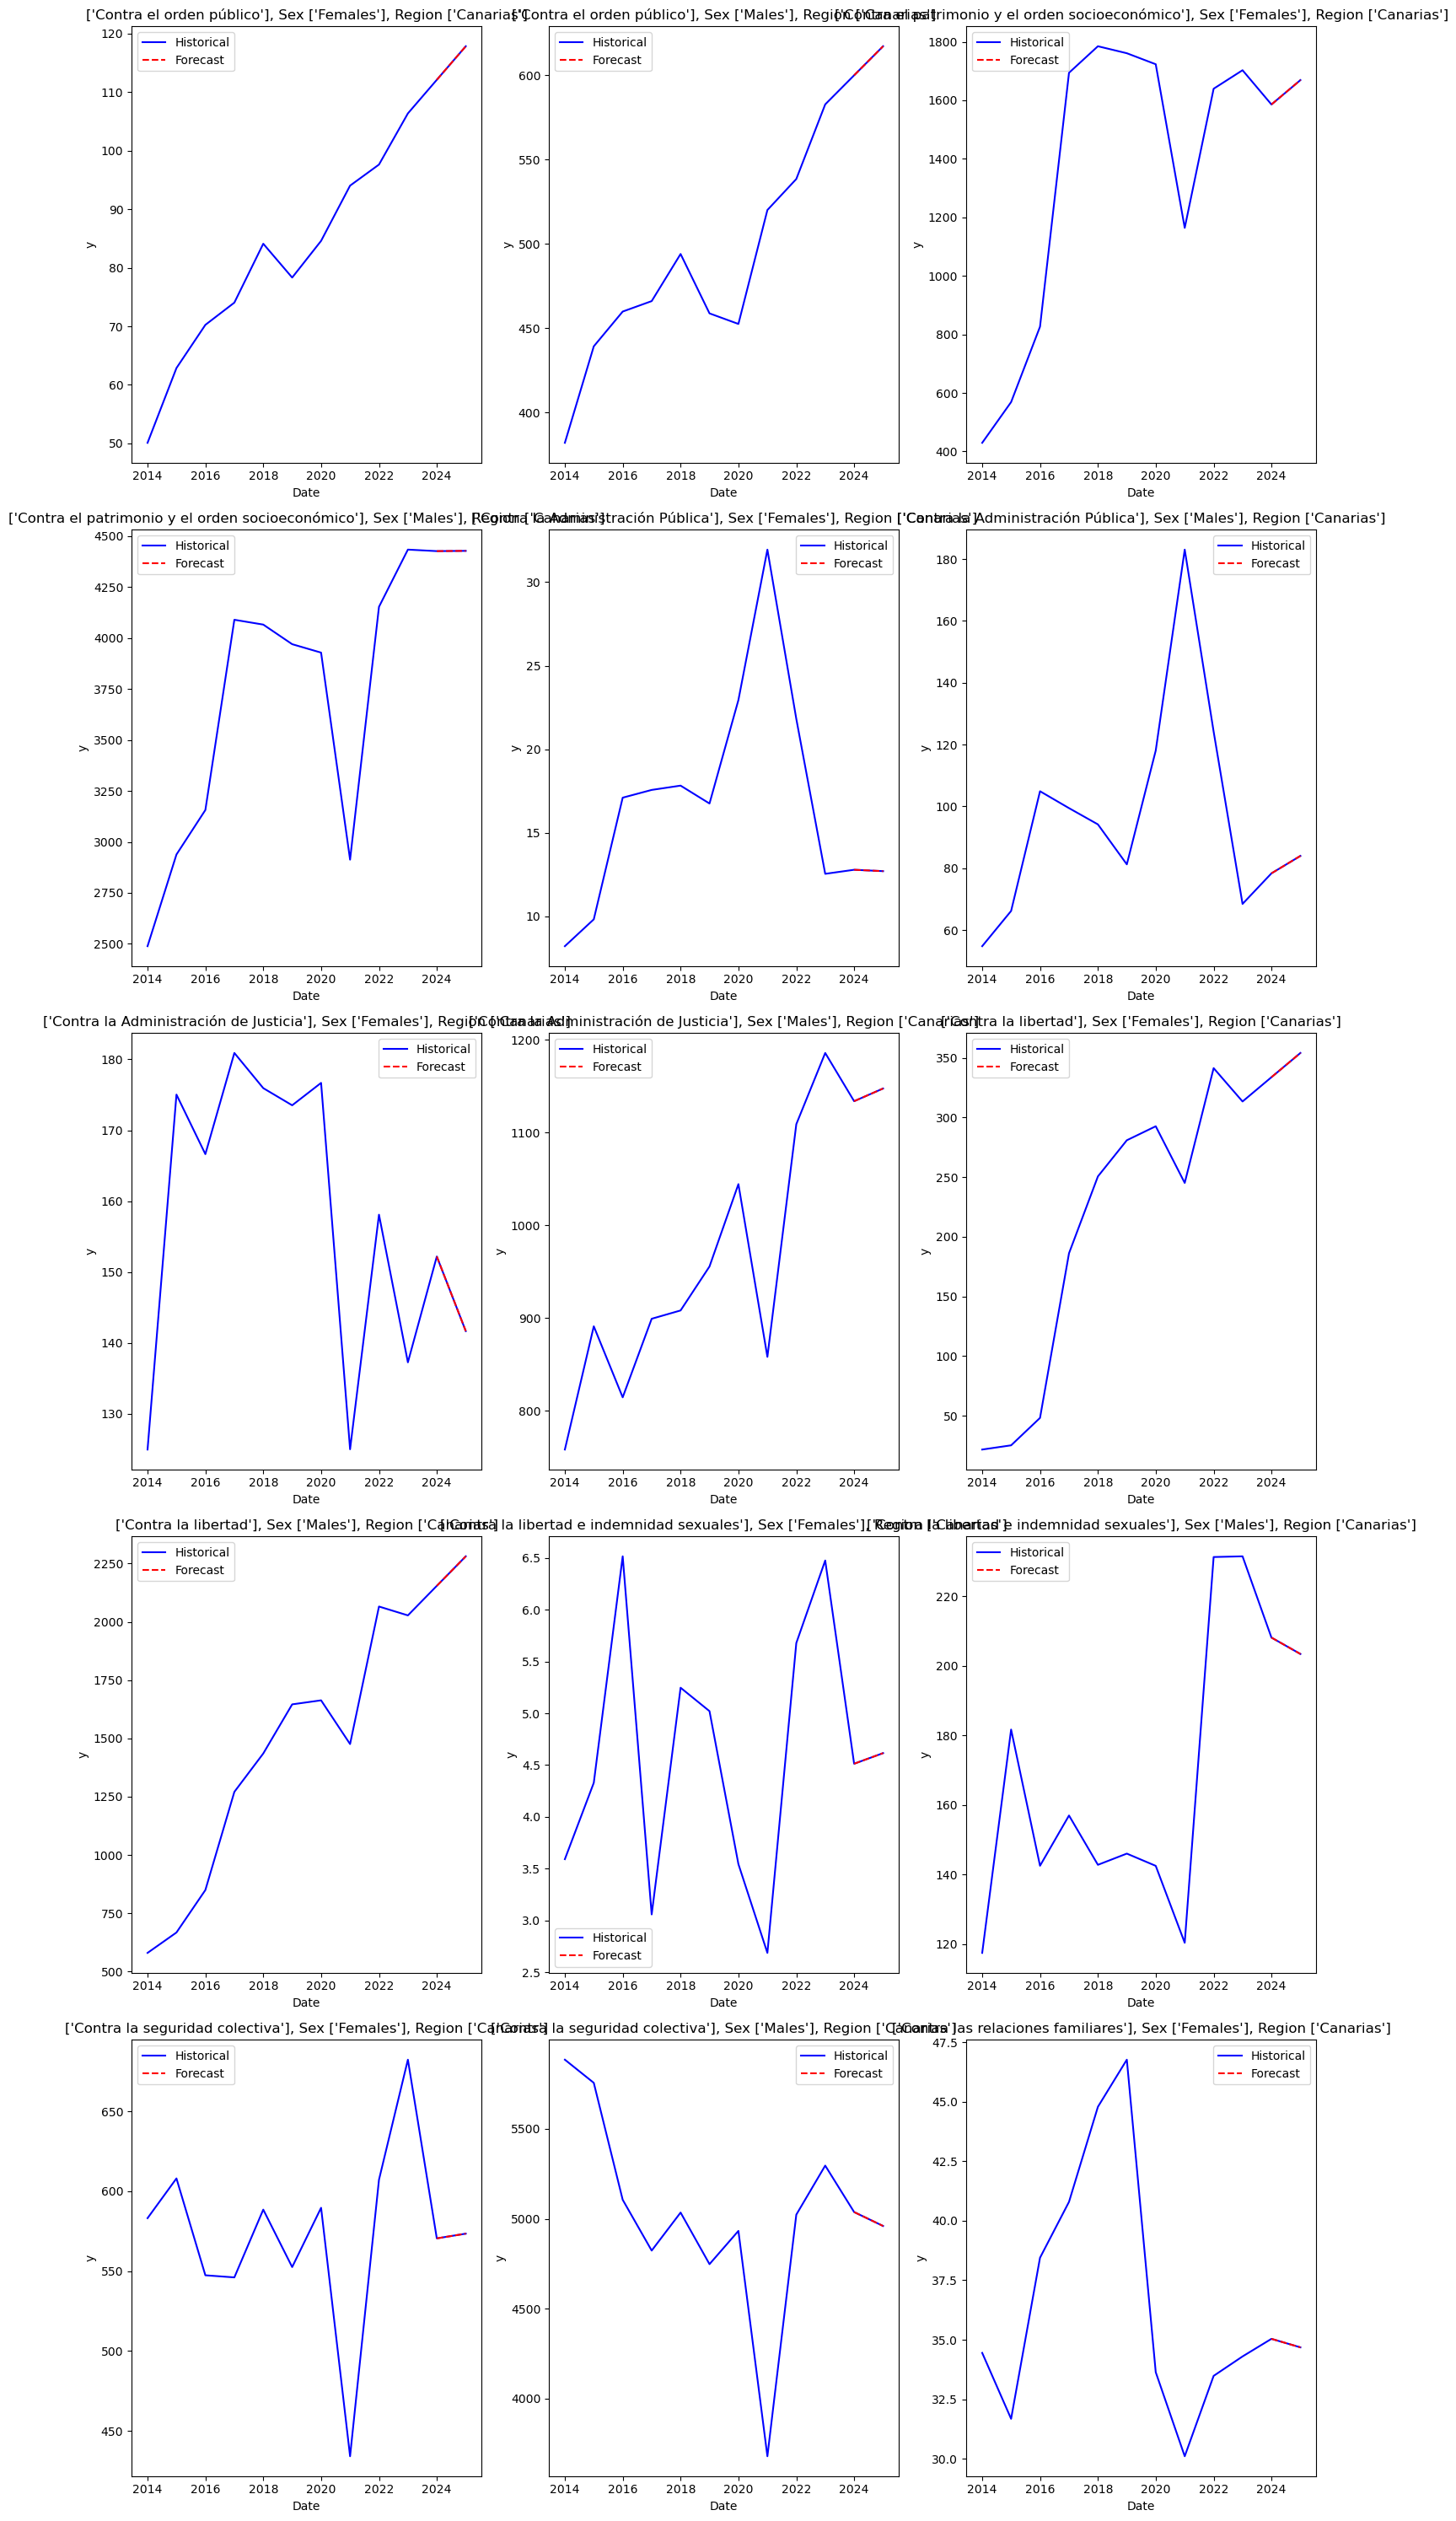

In [165]:

import numpy as np
from datetime import datetime, timedelta

forecast_end = pd.to_datetime('2024-12-31')


combined_data = {}

for crime_type in models:
    combined_data[crime_type] = {}
    for sex_group in models[crime_type]:
        combined_data[crime_type][sex_group] = {}
        for region in models[crime_type][sex_group]:
            # Select the relevant historical data
            historical_data = df_seperate_arima[
                (df_seperate_arima['type_of_crime_encoded'] == crime_type) & 
                (df_seperate_arima['sex_encoded'] == sex_group) &
                (df_seperate_arima['region_encoded'] == region)
            ]
            
            # Forecast
            last_date = historical_data['ds'].max()
            steps = (forecast_end.year - last_date.year) 
            forecast = models[crime_type][sex_group][region].forecast(steps=steps)
            
            forecast_dates = pd.date_range(start=last_date +  timedelta(days=365), periods=len(forecast), freq='A')
            forecast_df = pd.DataFrame({
                'ds': forecast_dates, 
                'y': forecast, 
                'type_of_crime_encoded': crime_type, 
                'sex_encoded': sex_group,
                'region_encoded': region
            })
            
            # Combine historical and forecast data
            combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)
            combined_data[crime_type][sex_group][region] = combined_df

plot_limit = 15
plot_count = 0

# Determine the layout of subplots
nrows = 5 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))  # Adjust the figsize as needed
fig.tight_layout(pad=6.0)

for crime_type in combined_data:
    if plot_count >= plot_limit: break
    for sex_group in combined_data[crime_type]:
        if plot_count >= plot_limit: break
        for region in combined_data[crime_type][sex_group]:
            if plot_count >= plot_limit: break
            
            ax = axes[plot_count // ncols, plot_count % ncols]
            combined_df = combined_data[crime_type][sex_group][region]
            
            # Plot historical data
            ax.plot(combined_df['ds'], combined_df['y'], label='Historical', color='blue')
            forecast_df = combined_df[combined_df['ds'] > last_date]
            ax.plot(forecast_df['ds'], forecast_df['y'], label='Forecast', color='red', linestyle='--')
            ax.set_title(f"{loaded_type_of_crime_encoder.inverse_transform([crime_type])}, Sex {loaded_sex_encoder.inverse_transform([sex_group])}, Region {loaded_region_encoder.inverse_transform([region])}")
            ax.set_xlabel('Date')
            ax.set_ylabel('y')
            ax.legend(loc='best')
            
            plot_count += 1

# Adjust unused subplots
for i in range(plot_count, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
#dont execute this is only for previous crimes loading and not used
import pandas as pd
import openpyxl

def process_excel(file_path):
    wb = openpyxl.load_workbook(file_path)
    sheet = wb.active  # Assumes the data is in the first sheet

    data = []
    current_region_type = None
    current_sex_type = None
    encountered_region_type = False 
    encountered_sex_type = False

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a crime type. 

        if  cell_a_value != None:
            if not cell_a_value[:1].isspace() :
                current_region_type = cell_a_value
                encountered_region_type = True  

                continue 
            
        if cell_a_value != None:
            if  cell_a_value[:4].isspace() and not cell_a_value[:5].isspace():
                current_sex_type = cell_a_value
                encountered_sex_type = True 

                continue 
            
        # After a crime type, the next rows are sex  until the next crime type.
        if cell_a_value != None:
            if not cell_a_value[:9].isspace():
                previouscrime = cell_a_value  

                for col in range(2, sheet.max_column + 1): 
                    year = sheet.cell(row=7, column=col).value 
                    value = sheet.cell(row=row, column=col).value
                    if value != None:
                        data.append([current_region_type,current_sex_type, previouscrime, year, value])
                continue
        


    df = pd.DataFrame(data, columns=['Region', 'sex','previouscrime' ,'Year', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'C:\Users\mahes\Downloads\numberofpreviouscrimes.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path)
df.columns = df.columns.str.replace(' ', '_', regex=False)
df = df[df['Region'] != 'National Total']
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['sex'] = df['sex'].str.strip()
df['previouscrime'] = df['previouscrime'].str.strip()

df = df[df['sex'] != 'Total']
df = df[df['previouscrime'] != 'Total']

df_prevcrime = df
